# Features
* customer_id - an anonymous id unique to a given customer
* Balance : - Current + Savings Account Balance
* PreviousCampaignResult - Last Campaign Results
* Product1...Product6 - List of different products owned by the customer
* Transaction1...Transaction9 - Last 9 transactions made by the customer
* External Accounts 1...External Accounts 7 - * External accounts held by the customer, including bills
* Activity Indicator - Number of activities done the customer, including telebanking, going to the bank
* Regular Interaction Indicator - How frequent the customer is interacting with the bank (Rating Scale)
* CompetitiveRate1 ... CompetitiveRate7 - Interest rates offered to the customer
* RateBefore - Interest rates on the products, customer have before the competitive rates being offered
* ReferenceRate -Interest rates on the products, the customer have after the negotiations made to the competitive rates being offered

# Import Data from Google Drive

# My Attempt - Abdullah

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# shareable link for test.csv
test_link = 'https://drive.google.com/file/d/15HIeCkM4rZ92umIzdeHcEjOxfB-VE_SI/view?usp=sharing'

# shareable link for train.csv
train_link = 'https://drive.google.com/file/d/1ctQvBW6zPi1Ki2N7ZHo9722QJeU0TyP3/view?usp=sharing'

# get the location id for test and train datasets
test_link_id = test_link.split('/')[5]
train_link_id = train_link.split('/')[5]

test_downloaded = drive.CreateFile({'id': test_link_id})
train_downloaded = drive.CreateFile({'id': train_link_id})

test_downloaded.GetContentFile('test.csv')
train_downloaded.GetContentFile('train.csv')

# create test and train dataframe
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Check if data loaded

In [ ]:
df_test.head()

,Customer_id,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP063999,13341.55,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,CTSP064000,18649.81,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,31188.04,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,CTSP064001,28311.30,0,1,0,0,1,0,0,0.0,0.0,0.0,120.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP064002,18066.61,0,1,0,0,0,0,0,0.0,0.0,0.0,5000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,CTSP064003,10512.30,0,0,0,0,0,0,0,0.0,0.0,0.0,1300.0,1400.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,10,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


In [ ]:
df_train.head()

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,0.00,0.0,0.0,8525.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,11,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,13422.35,800.0,0.0,0.0,0.0,13123.28,0.0,0.0,0.0,0,0,0,0,0,0,0,6,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,0.00,0.0,0.0,1000.0,23900.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,14,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,0.00,0.0,0.0,0.0,2000.0,27629.11,0.0,0.0,0.0,0,1,0,0,0,0,0,2,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375


# Useful Functions

In [ ]:
# a function that creates a dictionary of dataframes 
# where each key is the df's features and the values are the features respective df
def feat_dict(df):
  feature_dict = {}

  for i in df.columns:
    
    # create a df for each feature by subsetting df containing a certain literal string
    feature_dict[i] = df[df.columns[df.columns.str.contains(f'{i}', regex = False)]]

  return feature_dict

In [ ]:
# create feature dict for train dataset
feature_dict = feat_dict(df_train)

# Inspect data

## Inspect train dataframe
* 63999 rows
* 37 features
* no null/missing values but there are NaNs

In [ ]:
df_train.shape

(63999, 37)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  63999 non-null  object 
 1   Target                       63999 non-null  int64  
 2   Balance                      63999 non-null  float64
 3   PreviousCampaignResult       63999 non-null  int64  
 4   Product1                     63999 non-null  int64  
 5   Product2                     63999 non-null  int64  
 6   Product3                     63999 non-null  int64  
 7   Product4                     63999 non-null  int64  
 8   Product5                     63999 non-null  int64  
 9   Product6                     63999 non-null  int64  
 10  Transaction1                 63999 non-null  float64
 11  Transaction2                 63999 non-null  float64
 12  Transaction3                 63999 non-null  float64
 13  Transaction4    

In [ ]:
# check for null values - no null values
df_train.isnull().any()

Customer_id                    False
Target                         False
Balance                        False
PreviousCampaignResult         False
Product1                       False
Product2                       False
Product3                       False
Product4                       False
Product5                       False
Product6                       False
Transaction1                   False
Transaction2                   False
Transaction3                   False
Transaction4                   False
Transaction5                   False
Transaction6                   False
Transaction7                   False
Transaction8                   False
Transaction9                   False
ExternalAccount1               False
ExternalAccount2               False
ExternalAccount3               False
ExternalAccount4               False
ExternalAccount5               False
ExternalAccount6               False
ExternalAccount7               False
ActivityIndicator              False
R

In [ ]:
# check for null values - no null values
df_train.duplicated().any()

False

In [ ]:
df_train['Product3']

0        0
1        0
2        0
3        0
4        0
        ..
63994    0
63995    0
63996    0
63997    0
63998    0
Name: Product3, Length: 63999, dtype: int64

## Train Data Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae94a5e210>,
      dtype=object)

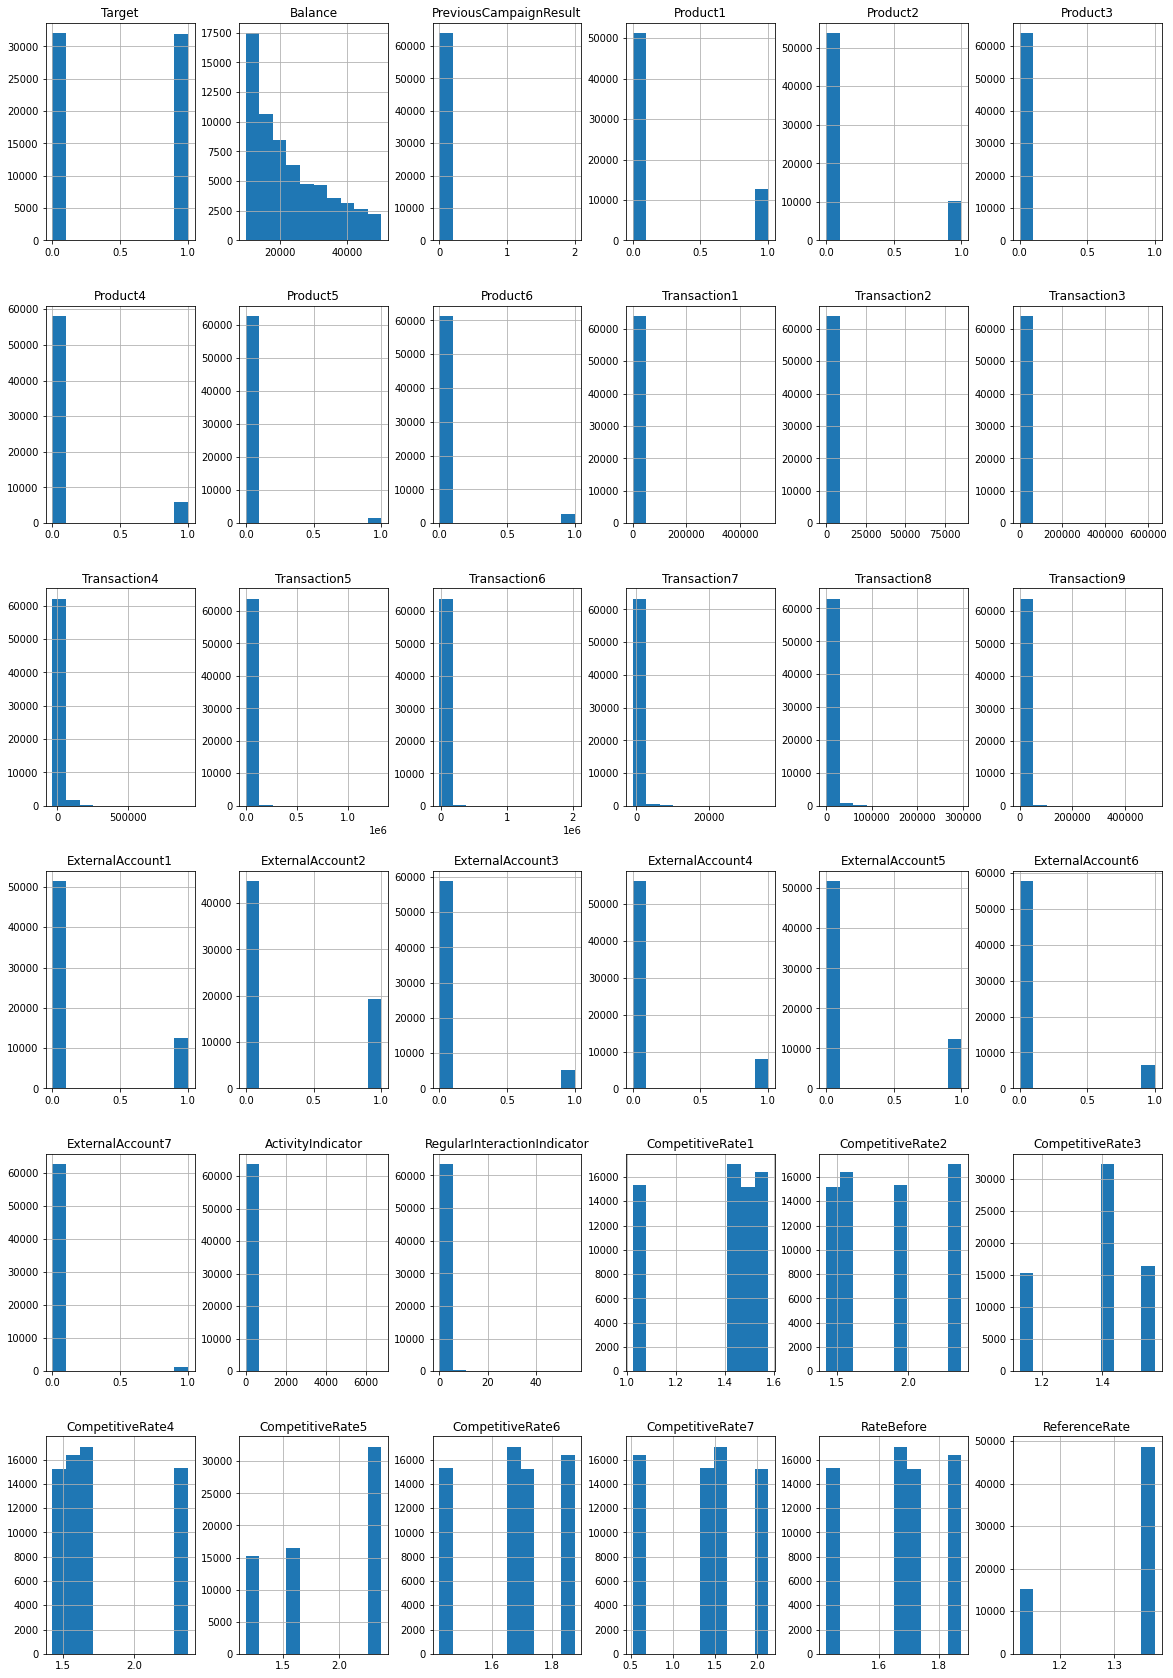

In [ ]:
df_train.hist(figsize = (20,30))

In [ ]:
df_train.groupby(['CompetitiveRate5']).sum()

,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
CompetitiveRate5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.175,7562,3.468550e+08,20,3022,2370,26,1417,344,632,4654494.30,1352082.42,14318349.09,2.018475e+08,9.224841e+07,1.339004e+08,1323370.08,22031860.15,17254858.07,3080,4566,1304,1914,2955,1493,298,293418,9307,15684.550,29456.350,17214.750,36342.250,21805.350,22570.450,21805.350,17214.750
1.575,8207,3.738786e+08,34,3290,2656,31,1539,349,690,4800890.34,1571019.12,16087908.56,2.178962e+08,9.541787e+07,1.499613e+08,1672006.07,24894181.87,19923344.30,3288,4980,1311,1979,3064,1716,307,346292,9773,25870.950,25870.950,25870.950,25870.950,30798.750,8623.650,30798.750,22585.750
2.375,16216,7.318526e+08,41,6516,5243,56,2942,723,1358,10566858.71,3368420.00,31828872.80,4.344322e+08,1.881672e+08,2.813762e+08,3480799.94,50503171.88,34736365.10,6242,9776,2667,4029,6260,3218,631,625984,19018,46746.225,62202.675,45986.175,50253.675,54813.975,59187.375,54813.975,44372.625


## Inspect Target Feature
* almost a 50/50 chance of customers responding and not responding to campaign

In [ ]:
feature_dict['Target'].value_counts()

Target
0         32014
1         31985
dtype: int64

## Target Distribution

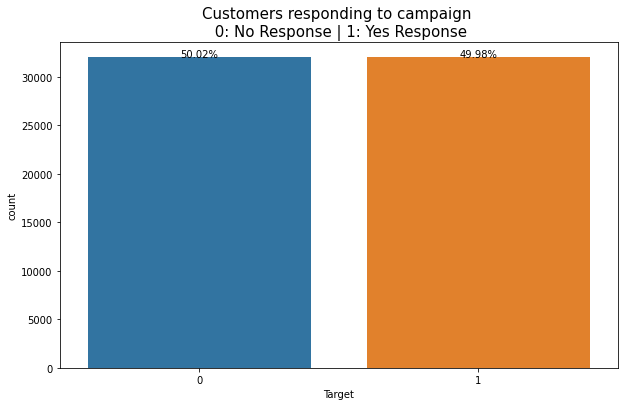

In [ ]:
total = len(feature_dict['Target'])

plt.figure(figsize = (10,6))

count_plot = sns.countplot(x = 'Target', data = feature_dict['Target'])
count_plot.set_title('Customers responding to campaign \n 0: No Response | 1: Yes Response', fontsize = 15)

for i in count_plot.patches:                    # get plot axis locations
  height = i.get_height()
  count_plot.text(
      i.get_x() + i.get_width() / 2,            # location of text
      height + 3,
      '{:.2f}%'.format(height / total * 100),   # proportion of total target sample size (2 sigfigs)
      ha = 'center',                            # center alignment
      fontsize = 10
  )

### Inspect Customer's Balance info
* a lot of customer's do not have large accounts with Bank "A"
* majority of the customers have accounts with less than $15000 in their accounts (chequing + savings)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae938ecdd0>]],
      dtype=object)

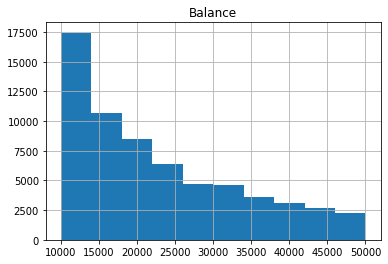

In [ ]:
feature_dict['Balance'].hist()

## Summary Statistics Notes on interest rate offers:
* interest rate offers never went higher than 2.4%
* interest rate offer were as low as 0.6% 
* CompRate6 has the same rates as RateBefore

For RateBefore
* avg interest rate of Bank "A" customers were 1.7% 

For ReferenceRate
* have two extremes, either 1.1% interest rate or 1.4% interest rate after negotiations and seeing the competitive rates offer
* customers end up negotiating for a 1.4% rate on products

### Summary Statistics of Competitive Rates

In [ ]:
# utilize list comprehension to get CompRate dataframes from feature_dict funciton
# use concat to convert list of df into one df
df_comp_rate = pd.concat([value for (key, value) in feature_dict.items() if 'CompetitiveRate' in key])

# get summary statistics of CompRates
df_comp_rate.describe()

,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7
count,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000
mean,1.379736,1.836435,1.391770,1.757322,1.882755,1.678434,1.412233
std,0.206340,0.370122,0.161833,0.357483,0.516006,0.160600,0.575083
min,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000
25%,1.425000,1.575000,1.425000,1.575000,1.575000,1.675000,0.525000
50%,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000
75%,1.575000,2.375000,1.575000,1.675000,2.375000,1.875000,1.575000
max,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000


### Summary Statistics of RateBefore

In [ ]:
# utilize list comprehension to get CompRate dataframes from feature_dict funciton
# use concat to convert list of df into one df
df_rate_before = pd.concat([value for (key, value) in feature_dict.items() if 'RateBefore' in key])

# get summary statistics for RateBefore
df_rate_before.describe()

,RateBefore
count,63999.000000
mean,1.678434
std,0.160600
min,1.425000
25%,1.675000
50%,1.675000
75%,1.875000
max,1.875000


### Summary Statistics of Reference Rate

In [ ]:
# utilize list comprehension to get CompRate dataframes from feature_dict funciton
# use concat to convert list of df into one df
df_ref_rate = pd.concat([value for (key, value) in feature_dict.items() if 'ReferenceRate' in key], axis = 1)

# get summary statistics for RateBefore
df_ref_rate.describe()

,ReferenceRate
count,63999.000000
mean,1.315226
std,0.106634
min,1.125000
25%,1.375000
50%,1.375000
75%,1.375000
max,1.375000


## Inspect Product
* not a lot of customers own product 3, only 0.18% of Bank "A" customers own product 3

In [ ]:
# need to include axis = 1 to avoid autofill of NaN for indices that do not align
df_product = pd.concat([value for (key, value) in feature_dict.items() if 'Product' in key], axis = 1)

product_dict = {}

# count the number of 0 and 1 for each product
# save results in a dict 
for (k,v) in df_product.items():
  product_dict[f'{k}'] = df_product[f'{k}'].value_counts()

# convert dict to dataframe
df_product_count = pd.DataFrame.from_dict(data = product_dict)

df_product_count

,Product1,Product2,Product3,Product4,Product5,Product6
0,51171,53730,63886,58101,62583,61319
1,12828,10269,113,5898,1416,2680


## Product Distribution

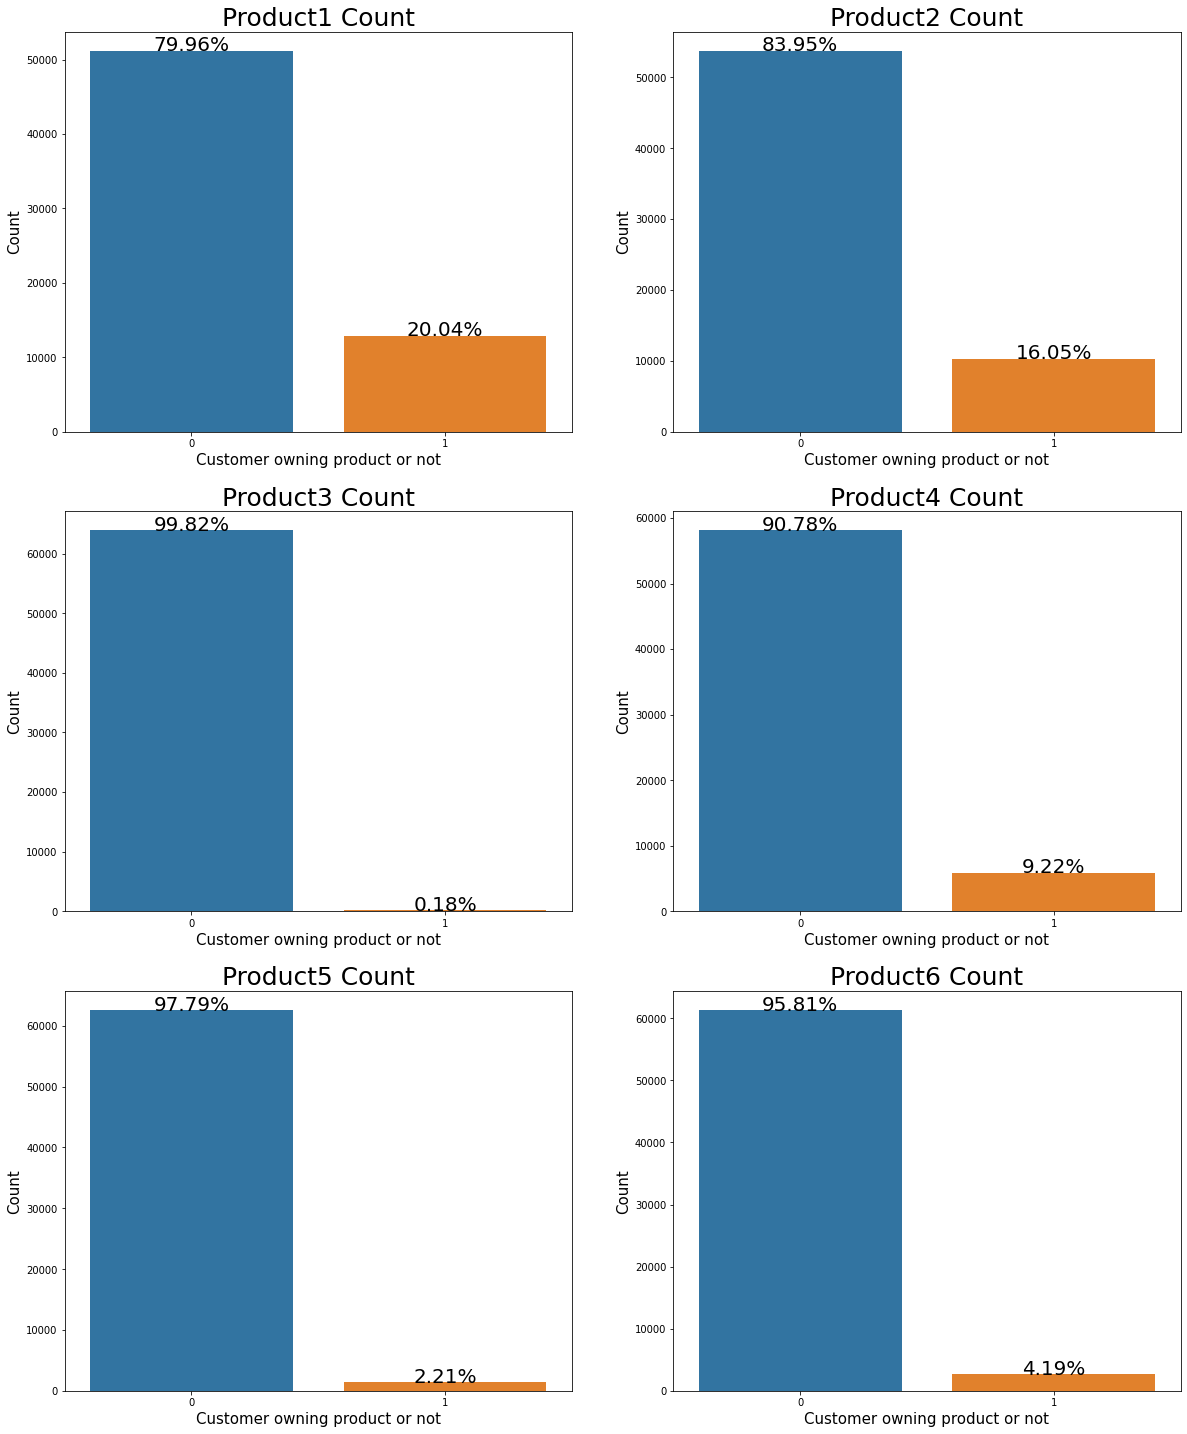

In [ ]:
# 3 x 2 subplots
fig, ax = plt.subplots(3, 2, figsize = (20,25))

total = df_product_count.sum()[0]
i = 1

axis_label_size = 15
title_size = 25

for axis in ax.flat:

  # make countplots for each product and place plot on the subplot axis created 
  plot = sns.countplot(data = feature_dict[f'Product{i}'], x = f'Product{i}', ax = axis)
  plot.set_title(f'Product{i} Count', fontsize = title_size)
  plot.set_xlabel('Customer owning product or not', fontsize = axis_label_size)
  plot.set_ylabel('Count', fontsize = axis_label_size)

  for n in plot.patches:                    # get plot info
    height = n.get_height()
    plot.text(
        n.get_x() + n.get_width() / 2,            # location of text
        height + 3,
        '{:.2f}%'.format(height / total * 100),   # proportion of total target sample size (2 sigfigs)
        ha = 'center',                            # center alignment
        fontsize = 20
    )

  i += 1

fig.show()

## Inspect Transaction (txn)

In [ ]:
# need to include axis = 1 to avoid autofill of NaN for indices that do not align
df_txn = pd.concat([value for (key, value) in feature_dict.items() if 'Transaction' in key], axis = 1)
df_txn

,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9
0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0
1,0.00,0.00,0.0,8525.0,0.00,0.00,0.0,0.0,0.0
2,13422.35,800.00,0.0,0.0,0.00,13123.28,0.0,0.0,0.0
3,0.00,0.00,0.0,1000.0,23900.00,0.00,0.0,0.0,0.0
4,0.00,0.00,0.0,0.0,2000.00,27629.11,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
63994,0.00,747.18,0.0,0.0,11496.44,22242.00,0.0,0.0,0.0
63995,0.00,0.00,0.0,300.0,0.00,0.00,0.0,0.0,0.0
63996,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0
63997,0.00,0.00,0.0,14300.0,0.00,0.00,0.0,0.0,0.0


# Categorical Feature Assessment 

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
df_cat1 = pd.concat([value for (key, value) in feature_dict.items() if 'PreviousCampaignResult' in key], axis=1)
df_cat2 = pd.concat([value for (key, value) in feature_dict.items() if 'Product' in key], axis=1)
df_cat3 = pd.concat([value for (key, value) in feature_dict.items() if 'ExternalAccount' in key], axis=1)
df_cat4 = pd.concat([value for (key, value) in feature_dict.items() if 'ReferenceRate' in key], axis=1)
df_cat = pd.concat([df_cat1, df_cat2, df_cat3, df_cat4], axis = 1)
df_cat.groupby(['ReferenceRate']).sum()

,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7
ReferenceRate,,,,,,,,,,,,,,
1.125,20,3022,2370,26,1417,344,632,3080,4566,1304,1914,2955,1493,298
1.375,75,9806,7899,87,4481,1072,2048,9530,14756,3978,6008,9324,4934,938


### 'PreviousCampaignresult' vs. 'Product'

Already I'm seeing that if option two of 'PreviousCampaignResult' is returned, then the client likely has Product 2. Additionally, based on the chi squared test Products 1, 3, 4, 5 & 6 have little evidence against the null hypothesis while the p value for Product 3 suggests a total rejection of the null hypothesis.

In [ ]:
print('Product1')
tab01 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['Product1'])

chi2, p, dof, exp = chi2_contingency(tab01.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab01

Product1
chi_sqrd stat 3.176 p_value 0.204


Product1,0,1
PreviousCampaignResult,,
0,51090,12816
1,79,12
2,2,0


In [ ]:
print('Product2')
tab02 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['Product2'])

chi2, p, dof, exp = chi2_contingency(tab02.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab02

Product2
chi_sqrd stat 150.487 p_value 0.000


Product2,0,1
PreviousCampaignResult,,
0,53695,10211
1,35,56
2,0,2


In [ ]:
print('Product3')
tab03 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['Product3'])

chi2, p, dof, exp = chi2_contingency(tab03.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab03

Product3
chi_sqrd stat 0.165 p_value 0.921


Product3,0,1
PreviousCampaignResult,,
0,63793,113
1,91,0
2,2,0


In [ ]:
print('Product4')
tab04 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['Product4'])

chi2, p, dof, exp = chi2_contingency(tab04.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab04

Product4
chi_sqrd stat 1.920 p_value 0.383


Product4,0,1
PreviousCampaignResult,,
0,58020,5886
1,79,12
2,2,0


In [ ]:
print('Product5')
tab05 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['Product5'])

chi2, p, dof, exp = chi2_contingency(tab05.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab05

Product5
chi_sqrd stat 2.052 p_value 0.358


Product5,0,1
PreviousCampaignResult,,
0,62494,1412
1,87,4
2,2,0


In [ ]:
print('Product6')
tab06 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['Product6'])

chi2, p, dof, exp = chi2_contingency(tab06.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab06

Product6
chi_sqrd stat 0.097 p_value 0.953


Product6,0,1
PreviousCampaignResult,,
0,61230,2676
1,87,4
2,2,0


### 'PreviousCampaignResult' vs. 'ExternalAccount'

Next I would like to take a closer look at 'PreviousCampaignResult' as it relates to 'ExternalAccount'. Based on the chi squared test Products 1, 3, 4, 6 & 7 have little evidence against the null hypothesis while the p value for External Accounts 2 & 5 suggests a total rejection of the null hypothesis.

In [ ]:
tab11 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['ExternalAccount1'])

chi2, p, dof, exp = chi2_contingency(tab11.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab11

chi_sqrd stat 1.816 p_value 0.403


ExternalAccount1,0,1
PreviousCampaignResult,,
0,51318,12588
1,70,21
2,1,1


In [ ]:
tab12 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['ExternalAccount2'])

chi2, p, dof, exp = chi2_contingency(tab12.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab12

chi_sqrd stat 11.564 p_value 0.003


ExternalAccount2,0,1
PreviousCampaignResult,,
0,44625,19281
1,52,39
2,0,2


In [ ]:
tab13 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['ExternalAccount3'])

chi2, p, dof, exp = chi2_contingency(tab13.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab13

chi_sqrd stat 0.215 p_value 0.898


ExternalAccount3,0,1
PreviousCampaignResult,,
0,58632,5274
1,83,8
2,2,0


In [ ]:
tab14 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['ExternalAccount4'])

chi2, p, dof, exp = chi2_contingency(tab14.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab14

chi_sqrd stat 0.445 p_value 0.801


ExternalAccount4,0,1
PreviousCampaignResult,,
0,55994,7912
1,81,10
2,2,0


In [ ]:
tab15 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['ExternalAccount5'])

chi2, p, dof, exp = chi2_contingency(tab15.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab15

chi_sqrd stat 22.310 p_value 0.000


ExternalAccount5,0,1
PreviousCampaignResult,,
0,51662,12244
1,56,35
2,2,0


In [ ]:
tab16 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['ExternalAccount6'])

chi2, p, dof, exp = chi2_contingency(tab16.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab16

chi_sqrd stat 3.440 p_value 0.179


ExternalAccount6,0,1
PreviousCampaignResult,,
0,57483,6423
1,87,4
2,2,0


In [ ]:
tab17 = pd.crosstab(df_cat['PreviousCampaignResult'] , df_cat['ExternalAccount7'])

chi2, p, dof, exp = chi2_contingency(tab17.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab17

chi_sqrd stat 0.074 p_value 0.964


ExternalAccount7,0,1
PreviousCampaignResult,,
0,62672,1234
1,89,2
2,2,0


### 'RefrenceRate' vs. 'Product' 

'RefrenceRate' vs. 'Product' begets a similar pattern and we can reject the null hypothesis for Product 2 alone while 1, 3, 4, 5 & 6 have insufficient evidence against it

In [ ]:
print('Product1')
tab21 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['Product1'])

chi2, p, dof, exp = chi2_contingency(tab21.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab21

Product1
chi_sqrd stat 1.068 p_value 0.301


Product1,0,1
ReferenceRate,,
1.125,12280,3022
1.375,38891,9806


In [ ]:
print('Product2')
tab22 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['Product2'])

chi2, p, dof, exp = chi2_contingency(tab22.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab22

Product2
chi_sqrd stat 4.584 p_value 0.032


Product2,0,1
ReferenceRate,,
1.125,12932,2370
1.375,40798,7899


In [ ]:
print('Product3')
tab23 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['Product3'])

chi2, p, dof, exp = chi2_contingency(tab23.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab23

Product3
chi_sqrd stat 0.013 p_value 0.909


Product3,0,1
ReferenceRate,,
1.125,15276,26
1.375,48610,87


In [ ]:
print('Product4')
tab24 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['Product4'])

chi2, p, dof, exp = chi2_contingency(tab24.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab24

Product4
chi_sqrd stat 0.041 p_value 0.840


Product4,0,1
ReferenceRate,,
1.125,13885,1417
1.375,44216,4481


In [ ]:
print('Product5')
tab25 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['Product5'])

chi2, p, dof, exp = chi2_contingency(tab25.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab25

Product5
chi_sqrd stat 0.097 p_value 0.756


Product5,0,1
ReferenceRate,,
1.125,14958,344
1.375,47625,1072


In [ ]:
print('Product6')
tab26 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['Product6'])

chi2, p, dof, exp = chi2_contingency(tab26.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab26

Product6
chi_sqrd stat 0.147 p_value 0.702


Product6,0,1
ReferenceRate,,
1.125,14670,632
1.375,46649,2048


### 'RefrenceRate' vs. 'ExternalAccount'

'RefrenceRate' vs. 'ExternalAccount' we don't have sufficient evidence to reject the null hypothesis for these relationships.

In [ ]:
tab31 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['ExternalAccount1'])

chi2, p, dof, exp = chi2_contingency(tab31.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab31

chi_sqrd stat 2.257 p_value 0.133


ExternalAccount1,0,1
ReferenceRate,,
1.125,12222,3080
1.375,39167,9530


In [ ]:
tab32 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['ExternalAccount2'])

chi2, p, dof, exp = chi2_contingency(tab32.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab32

chi_sqrd stat 1.159 p_value 0.282


ExternalAccount2,0,1
ReferenceRate,,
1.125,10736,4566
1.375,33941,14756


In [ ]:
tab33 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['ExternalAccount3'])

chi2, p, dof, exp = chi2_contingency(tab33.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab33

chi_sqrd stat 1.868 p_value 0.172


ExternalAccount3,0,1
ReferenceRate,,
1.125,13998,1304
1.375,44719,3978


In [ ]:
tab34 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['ExternalAccount4'])

chi2, p, dof, exp = chi2_contingency(tab34.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab34

chi_sqrd stat 0.297 p_value 0.586


ExternalAccount4,0,1
ReferenceRate,,
1.125,13388,1914
1.375,42689,6008


In [ ]:
tab35 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['ExternalAccount5'])

chi2, p, dof, exp = chi2_contingency(tab35.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab35

chi_sqrd stat 0.192 p_value 0.661


ExternalAccount5,0,1
ReferenceRate,,
1.125,12347,2955
1.375,39373,9324


In [ ]:
tab36 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['ExternalAccount6'])

chi2, p, dof, exp = chi2_contingency(tab36.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab36

chi_sqrd stat 1.773 p_value 0.183


ExternalAccount6,0,1
ReferenceRate,,
1.125,13809,1493
1.375,43763,4934


In [ ]:
tab37 = pd.crosstab(df_cat['ReferenceRate'] , df_cat['ExternalAccount7'])

chi2, p, dof, exp = chi2_contingency(tab37.values)
print('chi_sqrd stat %0.3f p_value %0.3f'%(chi2, p))
tab37

chi_sqrd stat 0.018 p_value 0.894


ExternalAccount7,0,1
ReferenceRate,,
1.125,15004,298
1.375,47759,938


# Numerical Feature Assessment

here I'll just do some rudimentary scalling and outlier investigation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7973e3e10>,
      dtype=object)

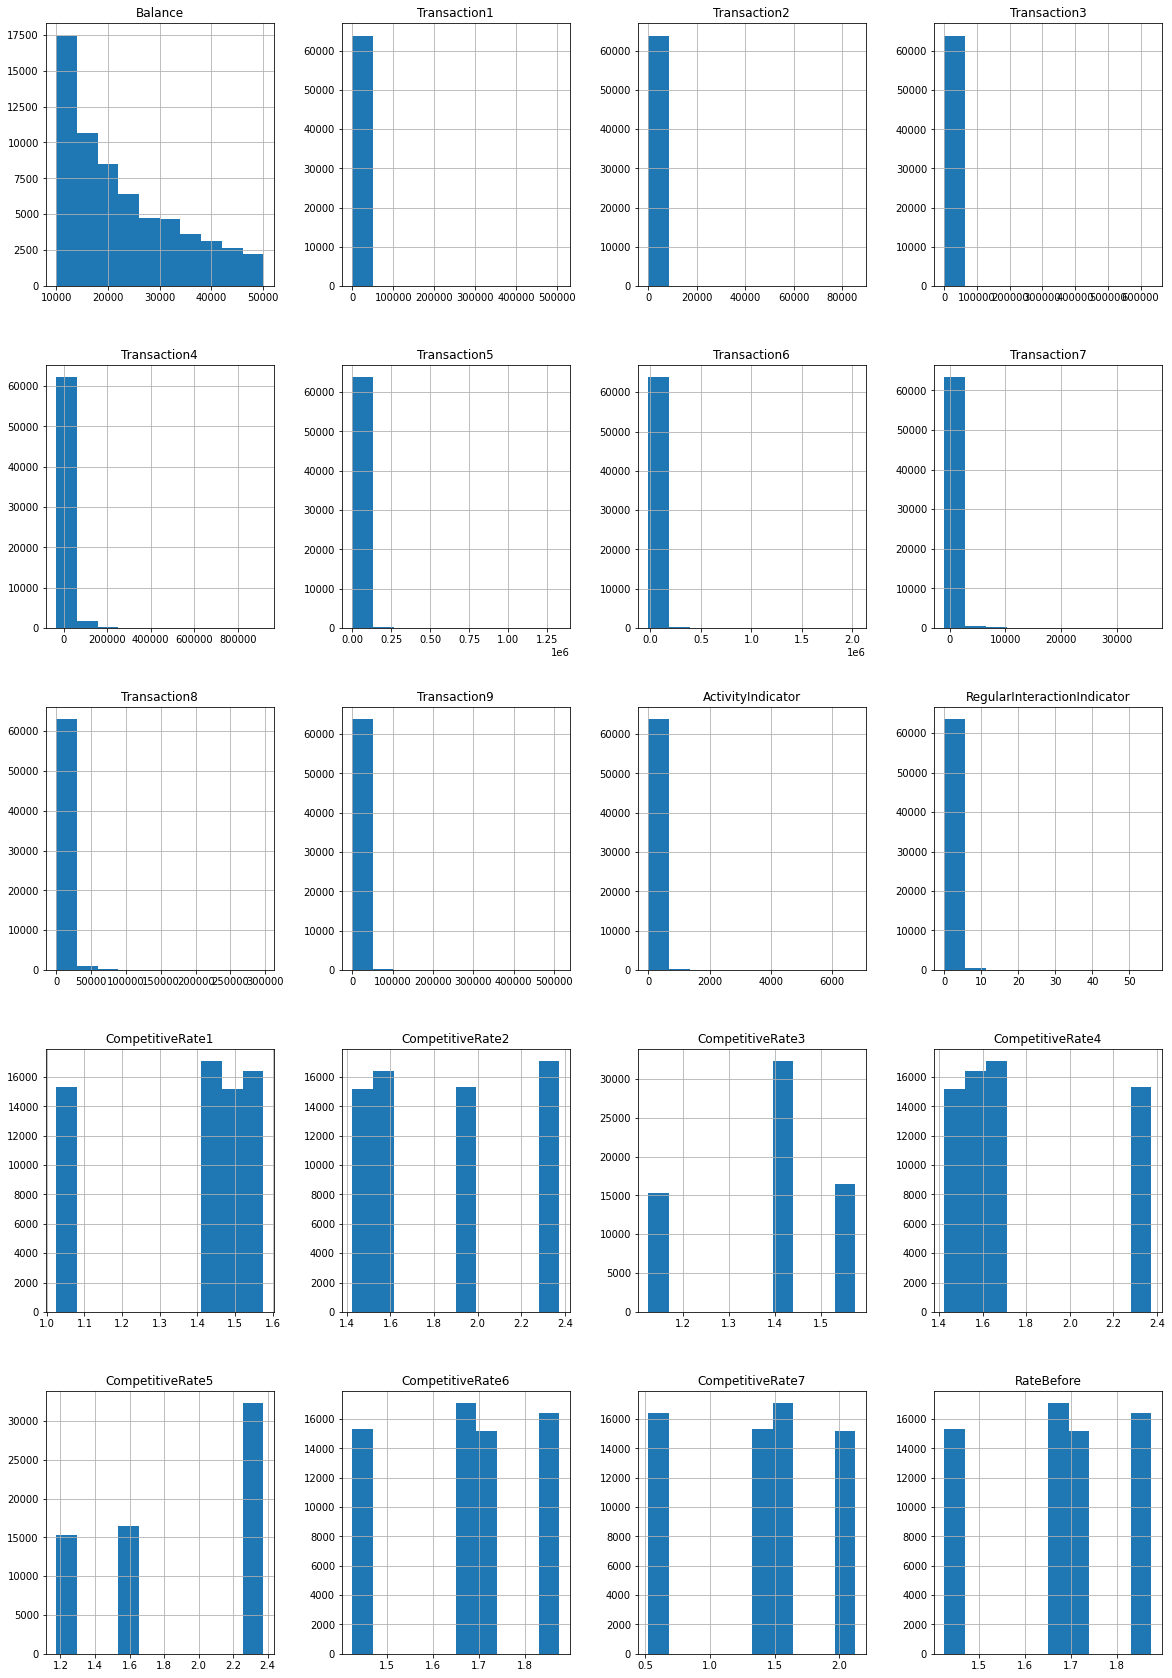

In [ ]:
df_num1 = pd.concat([value for (key, value) in feature_dict.items() if 'Balance' in key], axis=1)
df_num2 = pd.concat([value for (key, value) in feature_dict.items() if 'Transaction' in key], axis=1)
df_num3 = pd.concat([value for (key, value) in feature_dict.items() if 'ActivityIndicator' in key], axis=1)
df_num4 = pd.concat([value for (key, value) in feature_dict.items() if 'RegularInteractionIndicator' in key], axis=1)
df_num5 = pd.concat([value for (key, value) in feature_dict.items() if 'CompetitiveRate' in key], axis=1)
df_num6 = pd.concat([value for (key, value) in feature_dict.items() if 'RateBefore' in key], axis=1)

df_num = pd.concat([df_num1, df_num2, df_num3, df_num4, df_num5, df_num6], axis = 1)
df_num.hist(figsize=(20,30))

# Models

# Importing and Getting Ready

In [1]:
import numpy as np
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [3]:
df_test_1 = df_test.copy().drop('Customer_id', axis=1)

In [4]:
#y_pred = tuned_clf_model.predict(df_test_1)

#submission = pd.DataFrame ({
#    'Customer_id' : df_test['Customer_id']
#    'Target' : y_pred
#})

#submission['Target'].value_counts()

#submission.to_csv('submission.csv', index=False)

In [5]:
df_test_1.head()

,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,13341.55,0,0,0,0,0,0,0,0.0,0.0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,18649.81,0,1,0,0,0,0,0,0.0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,28311.30,0,1,0,0,1,0,0,0.0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,18066.61,0,1,0,0,0,0,0,0.0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,10512.30,0,0,0,0,0,0,0,0.0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


In [6]:
df_train.head()

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,...,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,...,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375


In [7]:
df_train = df_train.drop('Customer_id',axis=1)

TARGET = "Target"
columns_predictors = [col for col in df_train.columns if col not in [TARGET]]
columns_categorical = ['ReferenceRate', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: Target
columns_predictors: ['Balance', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate']
columns_categorical: ['ReferenceRate', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7']
columns_numerical: ['Balance', 'Transaction1', 'Transaction2', 'Transac

# Splitting Data and Transformations

In [9]:
X = df_train[columns_predictors]
y = df_train[TARGET]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (47999, 35)
X_test.shape: (16000, 35)
y_train.shape: (47999,)
y_test.shape: (16000,)


In [10]:
# Transforming numerical values using a numerical pipeline 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown='error')),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [11]:
# calling pipeline to transform data

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
df_test_1_transformed = pipeline_full.transform(df_test_1)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print(f"df_test_1_transformed.shape: {df_test_1_transformed.shape}")

X_train_transformed.shape: (47999, 51)
X_test_transformed.shape: (16000, 51)
df_test_1_transformed.shape: (1480, 51)


# Binary Classification 

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_transformed, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict(X_test_transformed)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [14]:
# accuracy is low, using cross_val_score

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test_transformed, y_test, cv=3, scoring="accuracy")

array([0.57855268, 0.55147197, 0.60022501])

In [15]:
from sklearn.base import BaseEstimator
class ZeroClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [16]:
# tried another classifier, did not perform that well 
Zero_clf = ZeroClassifier()
cross_val_score(Zero_clf, X_train_transformed, y_train, cv=3, scoring="accuracy")

array([0.4964375 , 0.5056875 , 0.49853116])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_transformed, y_train, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[17403,  6607],
       [12456, 11533]], dtype=int64)

In [19]:
y_train_perfect_predictions = y_train  
confusion_matrix(y_train, y_train_perfect_predictions)

array([[24010,     0],
       [    0, 23989]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

print("Precision Score:", precision_score(y_train, y_train_pred))
print("Recall Score:", recall_score(y_train, y_train_pred))

Precision Score: 0.6357772877618523
Recall Score: 0.48076201592396517


In [21]:
from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_train, y_train_pred))

F1 Score: 0.5475088418903844


In [22]:
y_scores = sgd_clf.decision_function(df_test_1_transformed)
y_scores

array([-0.80986875, -0.88933091, -1.31001232, ..., -0.9635658 ,
        0.00581489, -0.94112986])

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train_transformed, y_train, cv=3,
                             method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [25]:
(y_train_pred == (y_scores > 0)).all()

True

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.6402355956253655

In [27]:
submission_SGDC = sgd_clf.predict(df_test_1_transformed)
submission_SGDC

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [32]:


Customer_ID = df_test['Customer_id']
my_submission_SGDC = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": submission_SGDC})
my_submission_SGDC.to_csv('my_submission_SGDC.csv', index=False)

#my_submission_SGDC = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': submission_SGDC})
#my_submission_SGDC.to_csv('my_submission_SGDC.csv', index=False)
#from google.colab import files
#files.download("my_submission_SGDC.csv")

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train_transformed, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [34]:
y_knn_pred = knn_clf.predict(X_test_transformed)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.5538125

In [36]:
y_knn_pred_df_test = knn_clf.predict(df_test_1_transformed)
y_knn_pred_df_test

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_test_transformed, y_test, cv=3, scoring="accuracy")

array([0.5568054 , 0.54472155, 0.53478342])

In [38]:
Customer_ID = df_test['Customer_id']
my_submission_KNN = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_knn_pred_df_test})
my_submission_KNN.to_csv('my_submission_KNN.csv', index=False)

#my_submission_KNN = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_knn_pred_df_test})
#my_submission_KNN.to_csv('my_submission_KNN.csv', index=False)
#from google.colab import files
#files.download("my_submission_KNN.csv")

# Voting Classifiers

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [40]:
voting_clf.fit(X_train_transformed, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [41]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6145
RandomForestClassifier 0.59275
SVC 0.6181875
VotingClassifier 0.6216875


In [42]:
y_pred_final_HardVoting = voting_clf.predict(df_test_1_transformed)

In [43]:
y_pred_final_HardVoting

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
Customer_ID = df_test['Customer_id']
my_submission_HardVoting = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_HardVoting})
my_submission_HardVoting.to_csv('my_submission_HardVoting.csv', index=False)

#my_submission_HardVoting = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_HardVoting})
#my_submission_HardVoting.to_csv('my_submission_HardVoting.csv', index=False)
#from google.colab import files
#files.download("my_submission_HardVoting.csv")

In [45]:
# soft voting

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf2.fit(X_train_transformed, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [46]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf2):
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6145
RandomForestClassifier 0.59275
SVC 0.6181875
VotingClassifier 0.6165


In [47]:
y_pred_final_SoftVoting = svm_clf.predict(df_test_1_transformed)
y_pred_final_SoftVoting

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
Customer_ID = df_test['Customer_id']
my_submission_SoftVoting = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_SoftVoting})
my_submission_SoftVoting.to_csv('my_submission_SoftVoting.csv', index=False)

#my_submission_SoftVoting = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_SoftVoting})
#my_submission_SoftVoting.to_csv('my_submission_SoftVoting.csv', index=False)
#from google.colab import files
#files.download("my_submission_SoftVoting.csv")

# Bagging Ensembles

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train_transformed, y_train)
y_pred = bag_clf.predict(X_test_transformed)

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6258125


In [51]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_transformed, y_train)
y_pred_tree = tree_clf.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred_tree))

0.5380625


Regular decision tree model performed worse comapared to the bagging classifier model. 

In [52]:
# Make a random forest

#bag_clf = BaggingClassifier(
#    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
#    n_estimators=500, random_state=42)

In [53]:
#bag_clf.fit(X_train_transformed, y_train)
#y_pred = bag_clf.predict(X_test_transformed)

In [54]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train_transformed, y_train)

y_pred_rf = rnd_clf.predict(X_test_transformed)

In [55]:
for name, score in sorted(zip(X_train.columns, rnd_clf.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

CompetitiveRate6 0.05462171186889403
Product6 0.04131108578202509
Transaction1 0.033896152424196066
ReferenceRate 0.02121643817948723
Product5 0.015514924114890619
Product4 0.013592736614498446
RateBefore 0.004902373763064334
CompetitiveRate7 0.002802080170774556
RegularInteractionIndicator 0.0014850213358336818
CompetitiveRate1 0.0014377070543896333
Transaction7 0.0013803698439623167
Transaction6 0.0011638021397245627
Transaction8 0.0009176747820424043
Transaction9 0.0008188891120991244
ExternalAccount3 0.000528174155948301
Transaction4 0.0005192690731184816
Transaction5 0.0004427886450015501
CompetitiveRate5 0.00029670008606727457
ExternalAccount4 0.00027512644316477175
CompetitiveRate4 0.00022273755747741612
ExternalAccount5 0.0001820814055819906
ExternalAccount6 0.00017895275909870793
ExternalAccount2 0.0001407275458108239
Transaction2 0.00013319869747337084
Transaction3 9.472171784079228e-05
ExternalAccount1 9.357551957313676e-05
CompetitiveRate2 9.284632889143638e-05
PreviousCamp

In [56]:
rnd_clf.feature_importances_

array([3.80918570e-05, 8.40698677e-05, 3.64902811e-05, 6.98746602e-05,
       0.00000000e+00, 1.35927366e-02, 1.55149241e-02, 4.13110858e-02,
       3.38961524e-02, 1.33198697e-04, 9.47217178e-05, 5.19269073e-04,
       4.42788645e-04, 1.16380214e-03, 1.38036984e-03, 9.17674782e-04,
       8.18889112e-04, 9.35755196e-05, 1.40727546e-04, 5.28174156e-04,
       2.75126443e-04, 1.82081406e-04, 1.78952759e-04, 8.13975519e-05,
       3.62404835e-05, 1.48502134e-03, 1.43770705e-03, 9.28463289e-05,
       8.13149586e-05, 2.22737557e-04, 2.96700086e-04, 5.46217119e-02,
       2.80208017e-03, 4.90237376e-03, 2.12164382e-02, 3.77397494e-01,
       9.24129754e-02, 3.50222870e-02, 5.91657273e-03, 8.81054605e-03,
       2.22587035e-02, 2.54819589e-01, 3.30799134e-03, 1.82485045e-04,
       3.06736979e-04, 1.02441695e-04, 2.35088114e-04, 1.01078039e-04,
       9.93450904e-05, 6.42870067e-05, 2.73032248e-04])

In [57]:
accuracy_score(y_test, y_pred_rf)

0.6218125

In [58]:
y_pred_final_Bagging = bag_clf.predict(df_test_1_transformed)
y_pred_final_Bagging

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
Customer_ID = df_test['Customer_id']
my_submission_Bagging = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_Bagging})
my_submission_Bagging.to_csv('my_submission_Bagging.csv', index=False)

#my_submission_Bagging = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_Bagging})
#my_submission_Bagging.to_csv('my_submission_Bagging.csv', index=False)
#from google.colab import files
#files.download("my_submission_Bagging.csv")

In [60]:
out_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
out_bag_clf.fit(X_train_transformed, y_train)
out_bag_clf.oob_score_

0.5995124898435384

In [61]:
out_bag_clf.oob_decision_function_

array([[0.39306358, 0.60693642],
       [0.52525253, 0.47474747],
       [0.36686391, 0.63313609],
       ...,
       [0.43684211, 0.56315789],
       [0.89534884, 0.10465116],
       [0.51851852, 0.48148148]])

In [62]:
y_pred_outofbag = out_bag_clf.predict(X_test_transformed)
accuracy_score(y_test, y_pred_outofbag)

0.602125

In [63]:
y_pred_final_outofbag = out_bag_clf.predict(df_test_1_transformed)
y_pred_final_outofbag

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [97]:
Customer_ID = df_test['Customer_id']
my_submission_outofbag = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_outofbag})
my_submission_outofbag.to_csv('my_submission_outofbag.csv', index=False)


#my_submission_outofbag = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_outofbag})
#my_submission_outofbag.to_csv('my_submission_outofbag.csv', index=False)
#from google.colab import files
#files.download("my_submission_outofbag.csv")

# In-Depth Import Libraries 

In [65]:
#import the libraries for all the classifiers.

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Random Forest - In depth

In [66]:
X_train, X_nontrain, y_train, y_nontrain = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_nontrain.shape: {X_nontrain.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_nontrain.shape: {y_nontrain.shape}")

X_stack, X_test, y_stack, y_test = train_test_split(X_nontrain, y_nontrain, test_size=0.25, random_state=10086, stratify=y_nontrain) #stratified sampling based on the target
print(f"X_stack.shape: {X_stack.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_stack.shape: {y_stack.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (47999, 35)
X_nontrain.shape: (16000, 35)
y_train.shape: (47999,)
y_nontrain.shape: (16000,)
X_stack.shape: (12000, 35)
X_test.shape: (4000, 35)
y_stack.shape: (12000,)
y_test.shape: (4000,)


In [67]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_stack_transformed = pipeline_full.transform(X_stack)
X_test_transformed = pipeline_full.transform(X_test)


print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print(f"X_stack_transformed.shape: {X_stack_transformed.shape}")


X_train_transformed.shape: (47999, 51)
X_test_transformed.shape: (4000, 51)
X_stack_transformed.shape: (12000, 51)


In [68]:
# Design the random forest classifier

# Random Forest Classifier

n_estimators = [10, 200]
max_features = [0.1, 0.5]
max_depth = [2, 10, 20] 
oob_score = [True, False]
min_samples_split = [0.1, 0.5]
min_samples_leaf = [0.1, 0.5]
max_leaf_nodes = [2, 10, 100]

parameter_random_forest = {'n_estimators' : n_estimators, 'max_features' : max_features,
                     'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                    'oob_score' : oob_score, 'min_samples_leaf': min_samples_leaf, 
                     'max_leaf_nodes' : max_leaf_nodes}
             
Random_Forest_Classifier = RandomForestClassifier(random_state = 42)

#use grid search to tune the model|

grid_search_RndmForest = GridSearchCV(Random_Forest_Classifier,parameter_random_forest, cv = 4, scoring='roc_auc', refit = True,
                                     n_jobs = -1, verbose=2)

grid_search_RndmForest.fit(X_train_transformed,y_train)
             
forest_best_params_ = grid_search_RndmForest.best_params_
forest_best_estimators_ = grid_search_RndmForest.best_estimator_

print(forest_best_params_)
print(forest_best_estimators_)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.9min finished


{'max_depth': 10, 'max_features': 0.5, 'max_leaf_nodes': 10, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 200, 'oob_score': True}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=0.5,
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)


In [69]:
#Now Predict on the Stack Dataset
from sklearn.metrics import accuracy_score
Random_Forest_estimators = forest_best_estimators_
y_estimator_forest = Random_Forest_estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_forest))

0.6150833333333333


In [70]:
# Test on the Test Data
y_final_estimator_forest = Random_Forest_estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_forest))

0.61175


In [71]:
for name, score in sorted(zip(X_stack.columns, Random_Forest_estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

CompetitiveRate6 0.03562162916470827
Transaction1 0.009497092610830232
Product6 0.003737951983880884
Product5 0.0006075055141721476
Product4 0.00021801763059957672
CompetitiveRate1 9.426543030141179e-05
ExternalAccount3 2.9683134903385734e-05
Balance 0.0
PreviousCampaignResult 0.0
Product1 0.0
Product2 0.0
Product3 0.0
Transaction2 0.0
Transaction3 0.0
Transaction4 0.0
Transaction5 0.0
Transaction6 0.0
Transaction7 0.0
Transaction8 0.0
Transaction9 0.0
ExternalAccount1 0.0
ExternalAccount2 0.0
ExternalAccount4 0.0
ExternalAccount5 0.0
ExternalAccount6 0.0
ExternalAccount7 0.0
ActivityIndicator 0.0
RegularInteractionIndicator 0.0
CompetitiveRate2 0.0
CompetitiveRate3 0.0
CompetitiveRate4 0.0
CompetitiveRate5 0.0
CompetitiveRate7 0.0
RateBefore 0.0
ReferenceRate 0.0


In [72]:
y_final_stack_estimator_forest = Random_Forest_estimators.predict(df_test_1_transformed)

# Adaboost - In Depth

In [73]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [700, 100]
learning_rate = [0.001, 0.01, 0.1]
algorithm = ['SAMME', 'SAMME.R']

Ada_Classifer = AdaBoostClassifier(random_state = 42)
parameter_Ada_Classifer = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate, 'algorithm' : algorithm}
grid_search_AdaClassifier = GridSearchCV(Ada_Classifer, parameter_Ada_Classifer, cv = 4, scoring='roc_auc', refit = True, n_jobs = -1, verbose = 2)
grid_search_AdaClassifier.fit(X_train_transformed,y_train)

AdaClassifier_best_params_ = grid_search_AdaClassifier.best_params_
AdaClassifier_best_estimators_ = grid_search_AdaClassifier.best_estimator_
print(AdaClassifier_best_params_)
print(AdaClassifier_best_estimators_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  48 | elapsed:  1.7min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.1min finished


{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 700}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=700, random_state=42)


In [74]:
#check accuracy on stack dataset
AdaClassifier_Estimators = AdaClassifier_best_estimators_
y_estimator_ada = AdaClassifier_Estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_ada))

0.6235833333333334


In [75]:
# Check the accuracy on the Test Data
y_final_estimator_ada = AdaClassifier_Estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_ada))

0.62


In [76]:
for name, score in sorted(zip(X_stack.columns, AdaClassifier_Estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

CompetitiveRate6 0.11714285714285715
ReferenceRate 0.047142857142857146
RateBefore 0.045714285714285714
CompetitiveRate7 0.027142857142857142
Product2 0.018571428571428572
Product4 0.018571428571428572
Product5 0.014285714285714285
Transaction1 0.014285714285714285
Transaction6 0.007142857142857143
CompetitiveRate1 0.007142857142857143
ExternalAccount6 0.005714285714285714
RegularInteractionIndicator 0.005714285714285714
CompetitiveRate4 0.005714285714285714
Transaction9 0.004285714285714286
CompetitiveRate5 0.004285714285714286
Product6 0.002857142857142857
Transaction3 0.002857142857142857
Transaction5 0.002857142857142857
Transaction4 0.0014285714285714286
Transaction7 0.0014285714285714286
Transaction8 0.0014285714285714286
ExternalAccount5 0.0014285714285714286
Balance 0.0
PreviousCampaignResult 0.0
Product1 0.0
Product3 0.0
Transaction2 0.0
ExternalAccount1 0.0
ExternalAccount2 0.0
ExternalAccount3 0.0
ExternalAccount4 0.0
ExternalAccount7 0.0
ActivityIndicator 0.0
CompetitiveRat

In [77]:
y_final_stack_estimator_adaboost = AdaClassifier_Estimators.predict(df_test_1_transformed)

# Extra Trees Classifier - In Depth

In [78]:
Extra_Classifier = ExtraTreesClassifier(random_state = 42)

n_estimators = [400, 700, 1000]
max_features = [0.1, 0.3, 0.5, 1.0]
max_depth = [2, 5]
min_samples_split = [0.1, 0.3, 0.5, 1.0]
min_samples_leaf = [0.0001, 0.001, 0.1, 1.0] # Mhm, this one leads to accuracy of test and train sets being the same.|

parameter_Extra_Classifier = {'n_estimators' : n_estimators, 'max_features' : max_features,
                         'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                         'min_samples_leaf' : min_samples_leaf}

grid_search_ExtraClassifier = GridSearchCV(Extra_Classifier, parameter_Extra_Classifier, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)
grid_search_ExtraClassifier.fit(X_train_transformed,y_train)

Extra_Classifier_best_params_ = grid_search_ExtraClassifier.best_params_
Extra_Classifier_best_estimators_ = grid_search_ExtraClassifier.best_estimator_
print(Extra_Classifier_best_params_)
print(Extra_Classifier_best_estimators_)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed: 40.5min finished


{'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 0.0001, 'min_samples_split': 0.1, 'n_estimators': 400}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=0.0001, min_samples_split=0.1,
                     min_weight_fraction_leaf=0.0, n_estimators=400,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [79]:
#check accuracy on stack data
ExtraClassifier_Estimators = Extra_Classifier_best_estimators_
y_estimator_extra = ExtraClassifier_Estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_extra))

0.6020833333333333


In [80]:
# check the accuracy on the Test Data
y_final_estimator_extra = ExtraClassifier_Estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_extra))

0.6045


In [81]:
for name, score in sorted(zip(X_stack.columns, ExtraClassifier_Estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

Product6 0.20966374947192437
Transaction1 0.19908086209271433
CompetitiveRate6 0.1351370508862961
Product5 0.03932865975993817
Product4 0.03607610716999099
Transaction7 0.005829291222279885
Transaction6 0.005559208278822481
ExternalAccount3 0.0022787168063889206
ExternalAccount4 0.0021001084232334885
Transaction4 0.0019145898901727324
Transaction5 0.0012037246900454912
Transaction8 0.0005860904590217055
Transaction9 0.0005641156718250319
RegularInteractionIndicator 0.00043649209158801687
RateBefore 0.0004357850201825488
ReferenceRate 0.0003715801217798446
CompetitiveRate1 0.00025190173056178155
PreviousCampaignResult 9.429736843790148e-05
Balance 7.967911851821333e-05
Transaction2 5.655490376298945e-05
CompetitiveRate7 4.2327480642043035e-05
CompetitiveRate5 3.149062105837833e-05
CompetitiveRate4 2.183617741656478e-05
Transaction3 1.5280183079541534e-05
CompetitiveRate3 6.29870833298017e-06
ExternalAccount5 3.406464912741153e-06
Product1 0.0
Product2 0.0
Product3 0.0
ExternalAccount1 0

In [82]:
y_final_stack_estimator_extra = ExtraClassifier_Estimators.predict(df_test_1_transformed)

# Gradient Boosting Classifier - In Depth

In [83]:
# Gradient Boosting Classifier

GB_Classifier = GradientBoostingClassifier(random_state = 42)

n_estimators = [500, 1200, 2000]
learning_rate = [0.1, 0.0001, 0.001, 0.1]
max_depth = [2, 20]
min_samples_split = [0.1, 0.4]
min_samples_leaf = [2, 3]
max_features = [4, 7]
max_leaf_nodes = [2, 3]
                            
parameter_GB_Classifier = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                              'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
                              'max_leaf_nodes' : max_leaf_nodes}

grid_search_GB_Classifier = GridSearchCV(GB_Classifier, parameter_GB_Classifier, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_GB_Classifier.fit(X_train_transformed,y_train)

GB_Classifier_best_params_ = grid_search_GB_Classifier.best_params_

GB_Classifier_best_estimators_ = grid_search_GB_Classifier.best_estimator_

print(GB_Classifier_best_params_)

print(GB_Classifier_best_estimators_)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed: 39.5min finished


{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 0.1, 'n_estimators': 1200}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=7, max_leaf_nodes=3,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=1200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [84]:
#Now Predict on the Stack Dataset
GB_estimators = GB_Classifier_best_estimators_
y_estimator_GB = GB_estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_GB))

0.6268333333333334


In [85]:
# check the accuracy on the Test Data
y_final_estimator_GB = GB_estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_GB))

0.6255


In [86]:
y_final_stack_estimator_GB = GB_estimators.predict(df_test_1_transformed)

# Combining Models

In [87]:
print(y_estimator_forest.shape)
print(y_estimator_ada.shape)
print(y_estimator_extra.shape)
print(y_estimator_GB.shape)

(12000,)
(12000,)
(12000,)
(12000,)


In [88]:
# Now build the Stacking model
import numpy as np

Final_test_X = np.vstack((y_final_estimator_forest, y_final_estimator_ada, y_final_estimator_extra, y_final_estimator_GB))

Final_test_X = Final_test_X.T
Final_test_X.shape # now we get the right number of rows and columns

(4000, 4)

In [89]:
# Now build the Stacking model
import numpy as np

Final_Stacking_X = np.vstack((y_estimator_forest, y_estimator_ada, y_estimator_extra, y_estimator_GB))

Final_Stacking_X = Final_Stacking_X.T
Final_Stacking_X.shape # now we get the right number of rows and columns

(12000, 4)

In [90]:
# Additionally we can check the Stack performance on the Logistic Regression model, 

Logistic_Regression = LogisticRegression(random_state = 42)
C = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
                            
parameter_LogReg = {'C' : C}
grid_search_LogReg = GridSearchCV(Logistic_Regression, parameter_LogReg, cv = 9, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_LogReg.fit(Final_Stacking_X,y_stack)
LogReg_New_best_params = grid_search_LogReg.best_params_
LogReg_New_best_estimators = grid_search_LogReg.best_estimator_

print(LogReg_New_best_params)
print(LogReg_New_best_estimators)

Fitting 9 folds for each of 6 candidates, totalling 54 fits
{'C': 0.0001}
LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  54 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.0s finished


In [91]:
# Now check the accuracy of the Stacked Training set with the original Model Stacking Y.
y_estimator_LogReg = LogReg_New_best_estimators.predict(Final_Stacking_X)
print(accuracy_score(y_stack, y_estimator_LogReg))

0.6253333333333333


In [92]:
# Now check the accuracy of the Stacked Training set with the original Test Y
y_final_estimator_LogReg = LogReg_New_best_estimators.predict(Final_test_X)
print(accuracy_score(y_test,y_final_estimator_LogReg))

0.61775


In [93]:
Final_df_test = np.vstack((y_final_stack_estimator_forest, y_final_stack_estimator_adaboost, y_final_stack_estimator_extra, y_final_stack_estimator_GB))

Final_df_test = Final_df_test.T
Final_df_test.shape # now we get the right number of rows and columns

(1480, 4)

In [94]:
submission_FinalStackX = LogReg_New_best_estimators.predict(Final_df_test)
submission_FinalStackX

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
Customer_ID = df_test['Customer_id']
my_submission_FinalStackX = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": submission_FinalStackX})
my_submission_FinalStackX.to_csv('my_submission_FinalStackX.csv', index=False)

#my_submission_FinalStackX = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': submission_FinalStackX})
#my_submission_FinalStackX.to_csv('my_submission_FinalStackX.csv', index=False)
#from google.colab import files
#files.download("my_submission_FinalStackX.csv")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import \
auc, \
roc_auc_score, \
accuracy_score, \
roc_curve

In [3]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [4]:
print(f'df_train shape: {df_train.shape}')
print(f'df_test shape: {df_test.shape}')

df_train shape: (63999, 37)
df_test shape: (1480, 36)


In [5]:
df_train = df_train.drop('Customer_id', axis = 1)

In [6]:
print(f'df_train shape: {df_train.shape}')
print(f'df_test shape: {df_test.shape}')

df_train shape: (63999, 36)
df_test shape: (1480, 36)


In [37]:
# identify target, predicator, categorical, and continous variables 
# for pipeline transformations

Target = 'Target'

col_predictors = [col for col in df_train.columns if col not in [Target]]

print(f'TARGET: {Target} \n')
print(f'columns predictors: {col_predictors} \n')

TARGET: Target 

columns predictors: ['Balance', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate'] 



In [8]:
X = df_train[col_predictors]
y = df_train['Target']

# Matt's Attempt

# XBGoost ML Model

# XGBoost
* model is built using raw XGBoost functions - requires DMatrix format (preprocessing step)
* another method in building XGBoost is to use sklearn wrapper - utilizes pandas dataframes as inputs

## Advantange
1. Regularization
    * standard GBM (Gradient Boosting) has no regularization
    * XGboost has regularization
    * regularization tries to push coefficients of function to zero thus reducing cost term 
2. Parallel Processing
    * much faster than GBM
    * can use multiple cores to make tree
3. High Flexibility
    * custom opitmization objectives and evaluation criteria
4. Handling Missing Values
    * built in routine to handle missing values
    * user required to supply different value than other obersvations and pass this as a parameter
    * XGBoost tries different things as it encounters missing values on each node and learns which path to take for missing values
5. Tree Pruning
    * splits are made upto max_depth and pruning begins where splits are removed that have no positive gain
6. Built-in Cross-Validation
    * cross-validation at each iteration of boosting process 
    * thus is possible to get exact optimum number of boosting iterations in a single run
7. Continue on Exisiting Model

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier

In [60]:
def modelfit(model, dtrain, dtest, predictors, useTrainCV = True, cv_folds = 5, early_stopping_rounds = 50):
    
    if useTrainCV:
        
        # get params being passed to model
        xgb_param = model.get_xgb_params()
        
        # load training data that is readable for XGBoost
        xgtrain = xgb.DMatrix(
            dtrain[predictors].values, 
            label = dtrain[Target].values,
            feature_names = predictors      # important - to get the feature names for plotting
        )
        
        # load testing data that is readable for XGBoost
        xgtest = xgb.DMatrix(
            dtest[predictors].values
        )
        
        # use built-in cv to find optimum number of tress for current learning rate
        # num of trees = n_estimators
        cvresult = xgb.cv(
            xgb_param, 
            xgtrain, 
            num_boost_round = model.get_params()['n_estimators'], 
            nfold = cv_folds,
            metrics = 'auc', 
            early_stopping_rounds = early_stopping_rounds       # to find optimal num of boosting rounds
        )
        
        # set model num of trees to whatever xgboost.cv() found
        model.set_params(n_estimators = cvresult.shape[0])
    
    # Fit the algorithm on the data
    model.fit(dtrain[predictors], dtrain[Target], eval_metric = 'auc')
        
    # Predict training set:
    dtrain_predictions = model.predict(dtrain[predictors])            # actual 0 or 1 results
    dtrain_predprob = model.predict_proba(dtrain[predictors])[:,1]    # get probability predictions
    
    # Predict testing set:
    dtest_predictions = model.predict(dtest[predictors])
        
    # Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[Target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[Target], dtrain_predprob))
    
    # get fpr and tpr values
    fpr, tpr, thresholds = roc_curve(dtrain[Target], dtrain_predprob)
    
    # get auc score
    auc_score = auc(fpr, tpr)
    
    #Plot the Roc Curve
    plt.plot(
        fpr, 
        tpr,
        linewidth = 2, 
        label = 'AUC = {:.4f}'.format(auc_score)
    )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize = 10)
    plt.ylabel('True Positive Rate', fontsize = 10)
    plt.title('XGBoost ROC Curve', fontsize = 15)
    plt.legend(loc = 'lower right', fontsize = 10)
    plt.show()
    
    # feature importance plot
    
    # data for plot
    feat_imp = pd.Series(
        model.feature_importances_,        # y_values
        model.get_booster().feature_names  # x_values
    ).sort_values(ascending=False)         # descending order
    
    # make the bar-plot
    feat_imp.plot(
        kind = 'bar',
        figsize = (20, 10),
        fontsize = 20
    )
    
    # plot attributes
    plt.ylabel('Feature Importance Score', fontsize = 25)
    plt.xlabel('Features', fontsize = 25)
    plt.title('Feature Importances', fontsize = 30)

    return dtest_predictions

## Initial Run

In [11]:
xgb_clf_1 = XGBClassifier(
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = 5,
    min_child_weight = 1,
    gamma = 0,
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'binary:logistic',   # loss function to minimize (log for binary)
    nthread = 4,
    scale_pos_weight = 1,
    seed = 27
)

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.6437
AUC Score (Train): 0.697012


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

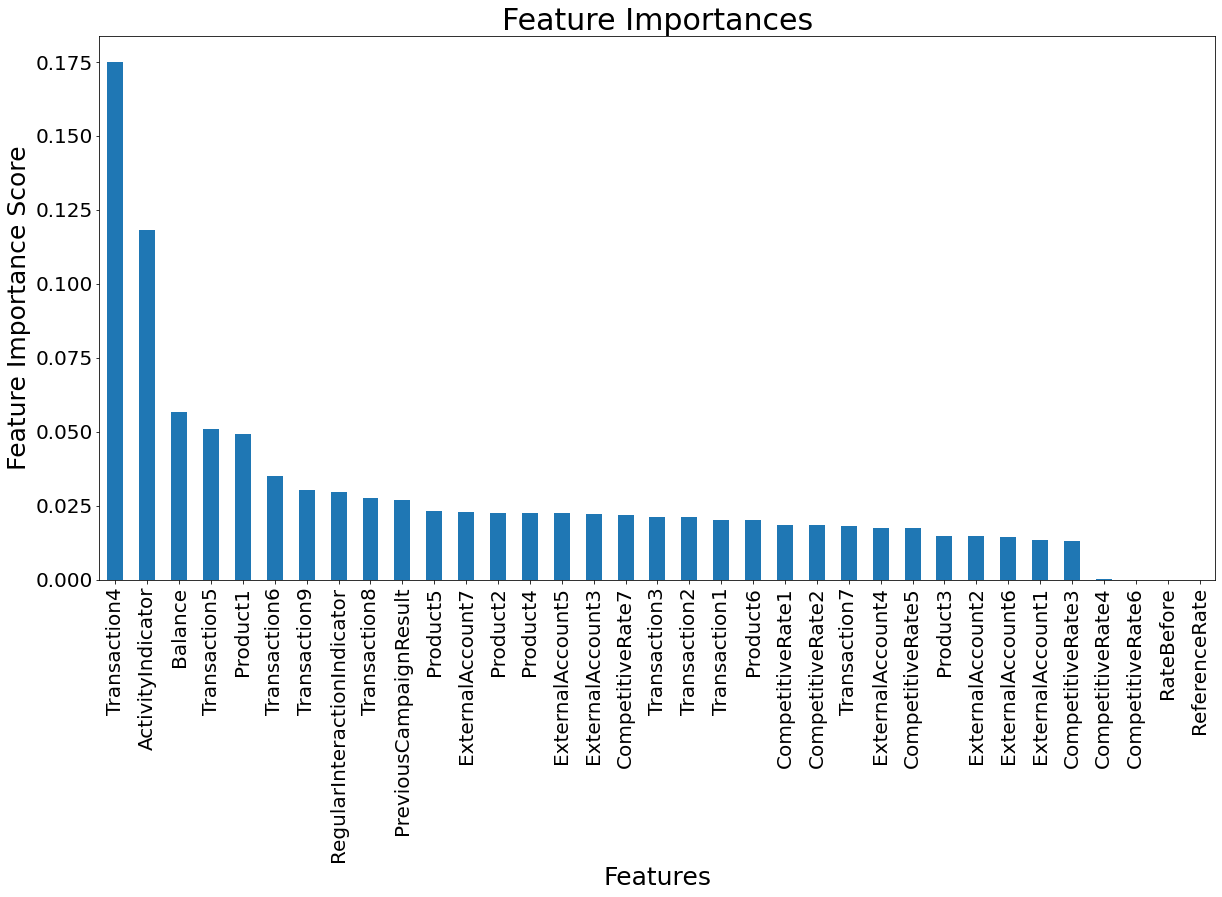

In [12]:
modelfit(xgb_clf_1, df_train, df_test, col_predictors)

## Tune max_depth and min_child_weight

In [13]:
param_test_1 = {
 'max_depth': range(3, 10, 2),
 'min_child_weight': range(1, 6, 2)
}

gs_1 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1, 
        n_estimators = 140, 
        max_depth = 5,
        min_child_weight = 1,
        gamma = 0, 
        subsample = 0.8, 
        colsample_bytree = 0.8,
        objective = 'binary:logistic', 
        nthread = 4, 
        scale_pos_weight = 1, 
        seed = 27
    ), 
    param_grid = param_test_1, 
    scoring = 'roc_auc',
    n_jobs = 4, 
    cv = 5
)

gs_1.fit(df_train[col_predictors], df_train[Target])

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [14]:
gs_1.best_params_, gs_1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.673802463705153)

In [15]:
param_test_2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}

gs_2 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1, 
        n_estimators = 140, 
        max_depth = 5,
        min_child_weight = 2, 
        gamma = 0,
        subsample = 0.8, 
        colsample_bytree = 0.8,
        objective = 'binary:logistic', 
        nthread = 4, 
        scale_pos_weight = 1,
        seed = 27
    ),
    param_grid = param_test_2, 
    scoring = 'roc_auc', 
    n_jobs = 4,
    cv = 5
)

gs_2.fit(df_train[col_predictors],df_train[Target])

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [16]:
gs_2.best_params_, gs_2.best_score_

({'max_depth': 4, 'min_child_weight': 6}, 0.6740262529907212)

## Tune Gamma

In [17]:
param_test_3 = {
 'gamma' : [i/10.0 for i in range(0,5)]
}

In [18]:
gs_3 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1, 
        n_estimators = 140, 
        max_depth = 4,
        min_child_weight = 6, 
        gamma = 0, 
        subsample = 0.8, 
        colsample_bytree = 0.8,
        objective = 'binary:logistic', 
        nthread = 4, 
        scale_pos_weight = 1,
        seed = 27
    ), 
    
    param_grid = param_test_3, 
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 5
)

gs_3.fit(df_train[col_predictors], df_train[Target])

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=6,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [19]:
gs_3.best_params_, gs_3.best_score_

({'gamma': 0.3}, 0.6741381790228578)

## Using new max depth, min child weight, gamma values

In [20]:
xgb_clf_2 = XGBClassifier(
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = 4,
    min_child_weight = 6,
    gamma = 0.3,
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'binary:logistic',
    nthread = 4,
    scale_pos_weight = 1,
    seed = 27
)


Model Report
Accuracy : 0.6412
AUC Score (Train): 0.692884


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

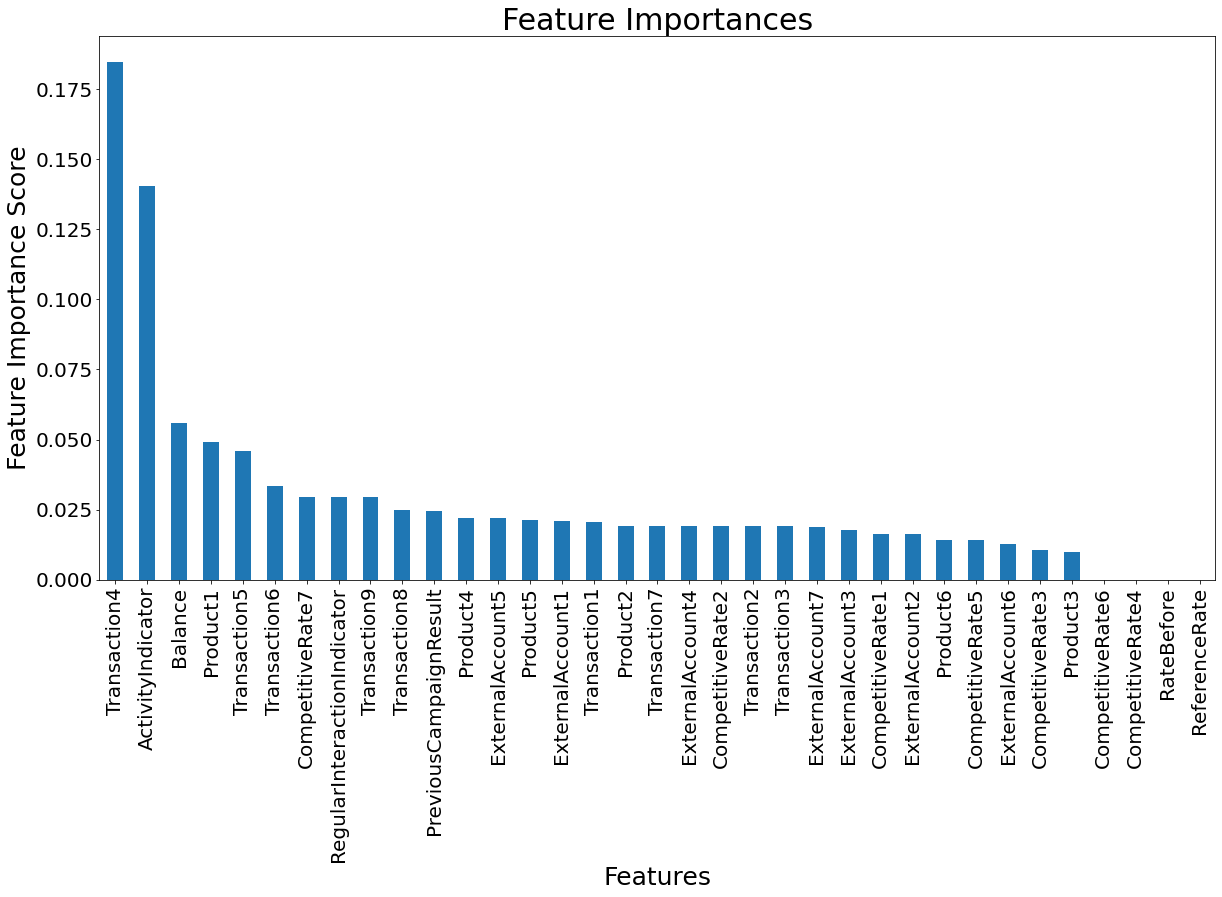

In [21]:
modelfit(xgb_clf_2, df_train, df_test, col_predictors)

## Tune subsample and colsample_bytree
* 0.1 intervals

In [22]:
param_test_4 = {
 'subsample' : [i / 10.0 for i in range(6,10)],
 'colsample_bytree' : [i / 10.0 for i in range(6,10)]
}

gs_4 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1, 
        n_estimators = 177,
        max_depth = 4,
        min_child_weight = 6, 
        gamma = 0, 
        subsample = 0.8, 
        colsample_bytree = 0.8,
        objective = 'binary:logistic', 
        nthread = 4, 
        scale_pos_weight = 1,
        seed = 27
    ), 
    param_grid = param_test_4, 
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 5
)

gs_4.fit(df_train[col_predictors], df_train[Target])

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=6,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=177, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [23]:
gs_4.best_params_, gs_4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.9}, 0.6740857007757658)

## Using 0.05 intervals for subsample and colsample_bytree

In [24]:
param_test_5 = {
 'subsample': [i/100.0 for i in range(75,90,5)],
 'colsample_bytree': [i/100.0 for i in range(75,90,5)]
}

gs_5 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1, 
        n_estimators = 177, 
        max_depth = 4,
        min_child_weight = 6, 
        gamma = 0, 
        subsample = 0.8, 
        colsample_bytree = 0.8,
        objective = 'binary:logistic', 
        nthread = 4, 
        scale_pos_weight = 1,
        seed = 27
    ), 
    param_grid = param_test_5, 
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 5
)

gs_5.fit(df_train[col_predictors], df_train[Target])

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=6,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=177, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [25]:
gs_5.best_params_, gs_5.best_score_

({'colsample_bytree': 0.85, 'subsample': 0.85}, 0.6739249830162086)

## Tune Regularization Parameters

In [26]:
param_test_6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gs_6 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1, 
        n_estimators = 177, 
        max_depth = 4,
        min_child_weight = 6, 
        gamma = 0.1, 
        subsample = 0.8, 
        colsample_bytree = 0.8,
        objective = 'binary:logistic', 
        nthread = 4, 
        scale_pos_weight = 1,
        seed = 27
    ), 
    param_grid = param_test_6, 
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 5
)

gs_6.fit(df_train[col_predictors],df_train[Target])

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=6,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=177, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [27]:
gs_6.best_params_, gs_6.best_score_

({'reg_alpha': 0.1}, 0.6741165226642958)

In [28]:
param_test_7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gs_7 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate = 0.1, 
        n_estimators = 177, 
        max_depth = 4,
        min_child_weight = 6, 
        gamma = 0.1, 
        subsample = 0.8, 
        colsample_bytree = 0.8,
        objective = 'binary:logistic', 
        nthread = 4, 
        scale_pos_weight = 1,
        seed = 27
    ), 
    param_grid = param_test_7, 
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 5
)

gs_7.fit(df_train[col_predictors], df_train[Target])

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=6,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=177, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [29]:
gs_7.best_params_, gs_7.best_score_

({'reg_alpha': 0.001}, 0.6740631698661663)

## Use new values for params

In [30]:
xgb_clf_3 = XGBClassifier(
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = 4,
    min_child_weight = 6,
    gamma = 0.3,
    subsample = 0.85,
    colsample_bytree = 0.85,
    reg_alpha = 0.001,
    objective = 'binary:logistic',
    nthread = 4,
    scale_pos_weight = 1,
    seed = 27
)


Model Report
Accuracy : 0.6395
AUC Score (Train): 0.690483


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

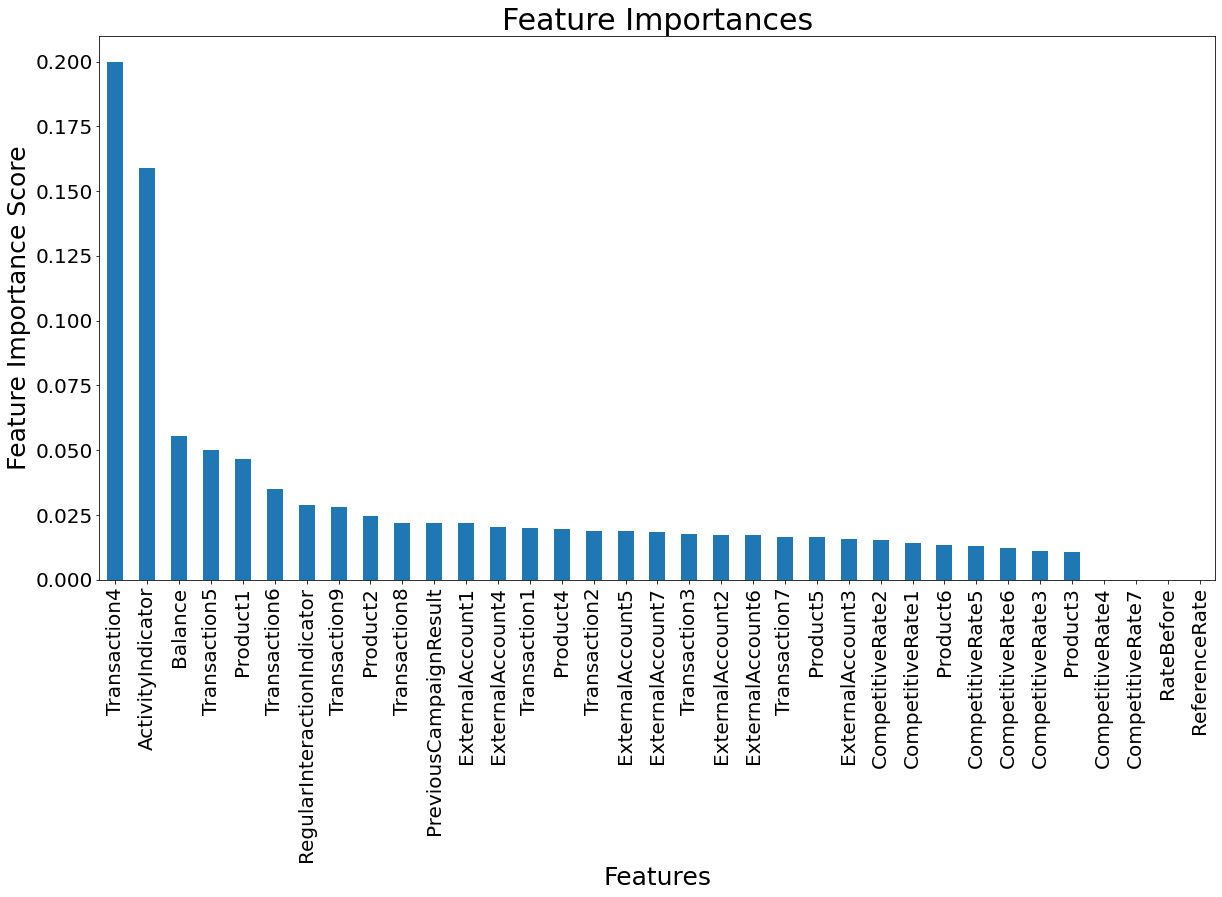

In [31]:
modelfit(xgb_clf_3, df_train, df_test, col_predictors)

## Reduce Learning Rate
 * increase number of tree / estimators

In [32]:
xgb_clf_4 = XGBClassifier(
    learning_rate = 0.01,
    n_estimators = 4000,
    max_depth = 4,
    min_child_weight = 6,
    gamma = 0.3,
    subsample = 0.85,
    colsample_bytree = 0.85,
    reg_alpha = 0.001,
    objective = 'binary:logistic',
    nthread = 4,
    scale_pos_weight = 1,
    seed = 27
)

C:\Users\Mah Lau\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.6427
AUC Score (Train): 0.695277


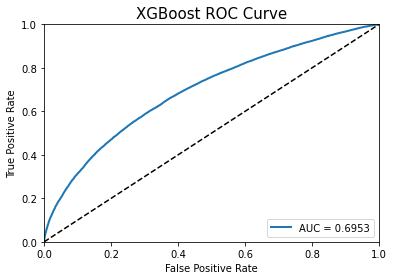

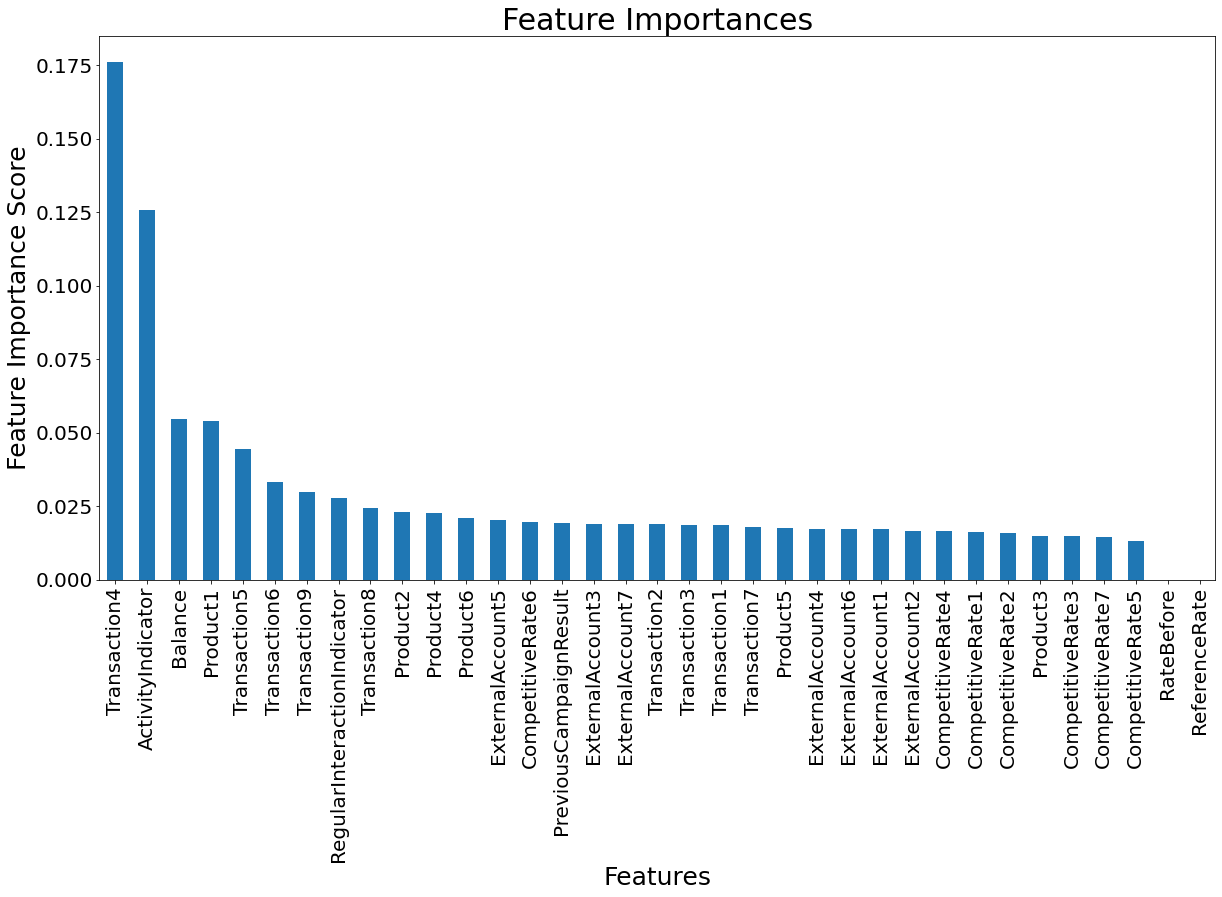

In [61]:
dtest_pred = modelfit(xgb_clf_4, df_train, df_test, col_predictors)

# submission

In [34]:
submission_xgb = pd.DataFrame({
    'Customer_id' : df_test['Customer_id'],
    'Target' : dtest_pred
})

In [35]:
submission_xgb['Target'].value_counts()

0    759
1    721
Name: Target, dtype: int64

In [36]:
submission_xgb.to_csv('submission.csv', index = False)